In [1]:
# IMPORTO I DATI PER VOTTIGNASCO
import os
import numpy as np

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy")
v_test_image_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy")
v_test_target_dates_path = os.path.join(work_path, "Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy")

# Carica l'array numpy dai file
vottignasco_test_OHE    = np.load(v_test_OHE_path)
vottignasco_test_image  = np.load(v_test_image_path)
vottignasco_test_dates  = np.load(v_test_target_dates_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_auc(x, y):
    """
    Calcola l'area sotto la curva (AUC) utilizzando il metodo del trapezio.

    :param x: Valori dell'asse x (frazione dei pixel/frame inseriti).
    :param y: Valori dell'asse y (errori calcolati).
    :return: Area sotto la curva.
    """
    return np.trapz(y, x)

def plot_combined_curves(all_errors_insertion, all_errors_deletion, parameter_combinations, title="", save_path=""):
    # Creazione della figura e dei due subplot (1 riga, 2 colonne)
    fig, axs = plt.subplots(1, 2, figsize=(7, 5))

    # # Plot per la curva di inserimento
    # max_len_insertion = max(map(len, all_errors_insertion))
    # padded_array_insertion = np.full((len(all_errors_insertion), max_len_insertion), np.nan)
    # for i, row in enumerate(all_errors_insertion):
    #     padded_array_insertion[i, :len(row)] = row  # Riempie solo le parti esistenti
    mean_errors_for_insertion_vott = np.nanmean(all_errors_insertion, axis=0)

    #x_insertion = np.arange(0, mean_errors_for_insertion_vott.shape[0])
    x_insertion = np.linspace(0, 1, mean_errors_for_insertion_vott.shape[0])
    auc_insertion = calculate_auc(x_insertion, mean_errors_for_insertion_vott)
    auc_text_insertion = f'AUC = {auc_insertion:.2f}'
    axs[0].plot(x_insertion, mean_errors_for_insertion_vott, label=f'Error Curve, {auc_text_insertion}')
    #axs[0].scatter(x_insertion, mean_errors_for_insertion_vott, color='blue', zorder=3)    
    

    axs[0].fill_between(x_insertion, mean_errors_for_insertion_vott, color='skyblue', alpha=0.4)
    axs[0].set_xlabel('Fraction of pixels inserted')
    axs[0].set_ylabel('Mean Squared Error')
    axs[0].grid(True, linestyle='--', alpha=0.6)
    axs[0].set_title('Mean Insertion Metric Curve')
    axs[0].legend()

    # # Plot per la curva di cancellazione
    # max_len_deletion = max(map(len, all_errors_deletion))
    # padded_array_deletion = np.full((len(all_errors_deletion), max_len_deletion), np.nan)
    # for i, row in enumerate(all_errors_deletion):
    #     padded_array_deletion[i, :len(row)] = row  # Riempie solo le parti esistenti
    # mean_errors_for_deletion_vott = np.nanmean(padded_array_deletion, axis=0)
    mean_errors_for_deletion_vott = np.nanmean(all_errors_deletion, axis=0)

    #x_deletion = np.arange(0, mean_errors_for_deletion_vott.shape[0])
    x_deletion = np.linspace(0, 1, mean_errors_for_deletion_vott.shape[0])
    auc_deletion = calculate_auc(x_deletion, mean_errors_for_deletion_vott)
    auc_text_deletion = f'AUC = {auc_deletion:.2f}'
    
    axs[1].plot(x_deletion, mean_errors_for_deletion_vott, label=f'Error Curve, {auc_text_deletion}')
    #axs[1].scatter(x_deletion, mean_errors_for_deletion_vott, color='red', zorder=3)
    axs[1].fill_between(x_deletion, mean_errors_for_deletion_vott, color='lightcoral', alpha=0.4)
    axs[1].set_xlabel('Fraction of pixels removed')
    axs[1].set_ylabel('Mean Squared Error')
    axs[1].grid(True, linestyle='--', alpha=0.6)
    axs[1].set_title('Deletion Mean Metric Curve')
    axs[1].legend()

    # Aggiungi il titolo globale
    plt.suptitle(title, fontsize=16)
    # Mostra i plot
    plt.tight_layout()

    # Salva la figura con DPI 400
    #plt.tight_layout()
    #plt.subplots_adjust(top=0.85)  # Per evitare che il titolo si sovrapponga ai grafici
    #plt.savefig(save_path, dpi=400)

    plt.show()

    return auc_insertion, auc_deletion

In [3]:
import pickle

path_to_load_results = os.path.join(work_path, "Water_Resources/rise-video/XAI/spatial/results/rise_original_multiplicative_norm_zero/results_setup_new_h_w_inv_sigmoide.pkl")
# Load della lista results
with open(path_to_load_results, 'rb') as file:
  result_st = pickle.load(file)


KeyboardInterrupt: 

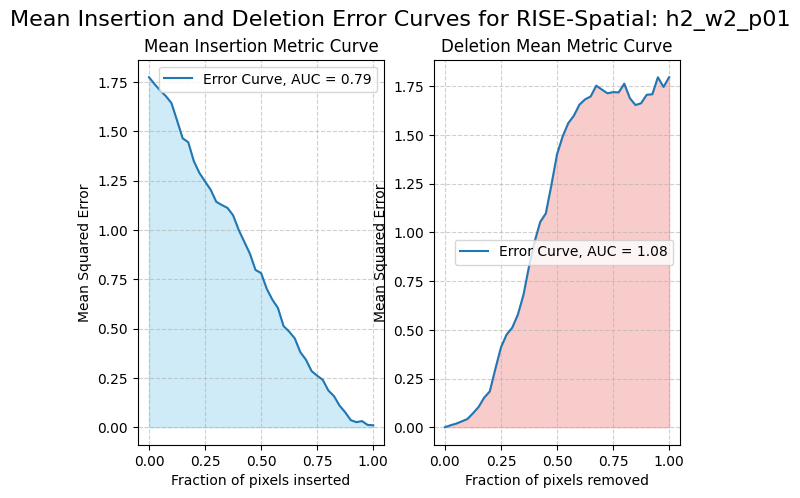

In [29]:
all_param_auc_insertion = []
all_param_auc_deletion  = []

for result in result_st:
    #result = result_st[0]

    all_errors_insertion = result["errors_insertion"]
    all_errors_deletion = result["errors_deletion"]


    parameters = result["parameters_comb"]

    mean_auc_insertion, mean_auc_deletion = plot_combined_curves(all_errors_insertion, all_errors_deletion, parameters, 
                                            title=f"Mean Insertion and Deletion Error Curves for RISE-Spatial: {parameters}")

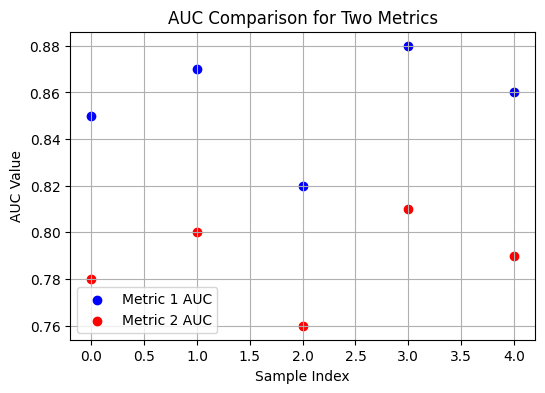

In [24]:
# Dati di esempio: liste delle AUC per le due metriche
auc_metric1 = [0.85, 0.87, 0.82, 0.88, 0.86]
auc_metric2 = [0.78, 0.80, 0.76, 0.81, 0.79]

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(auc_metric1)), auc_metric1, color='blue', label='Metric 1 AUC')
plt.scatter(range(len(auc_metric2)), auc_metric2, color='red', label='Metric 2 AUC')

# Personalizzazioni
plt.title('AUC Comparison for Two Metrics')
plt.xlabel('Sample Index')
plt.ylabel('AUC Value')
plt.legend()
plt.grid(True)
plt.show()